## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*Ans-* A prediction algorithm based on this data is projected to give growers with information on the wuality of price of their harvest without relying heavily on the upredictablity of wine tasters. 

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*Ans* -The most critical variables for determining the kind of wine are - 
        • Sulphur dioxide
        • Chlorides
        • Volatile Acids and 
The least significant values are - 
    • Aclohol
    • Citric Acid
    • Residual Sugar

### Data Collection

**Q3. From where do we get our data?**

*Ans*- Source of our data is from -  Paulo Cortez, University of Minho,Guimarães,Portugal 

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

*Ans*-  Samples are obtained from Department of Information Systems/ R&D Centre Algortimi, University of Minho, Portugal

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

*Ans*- Only physicochemical and sensory variables are available due to the logistical and privacy concerns, not much data is available like, there is no data about types of grapes or branding of wine neither the price of wine.

*TODO*
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data.shape

(1599, 12)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#Understand the data by carrying out any steps that you think are necessary
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

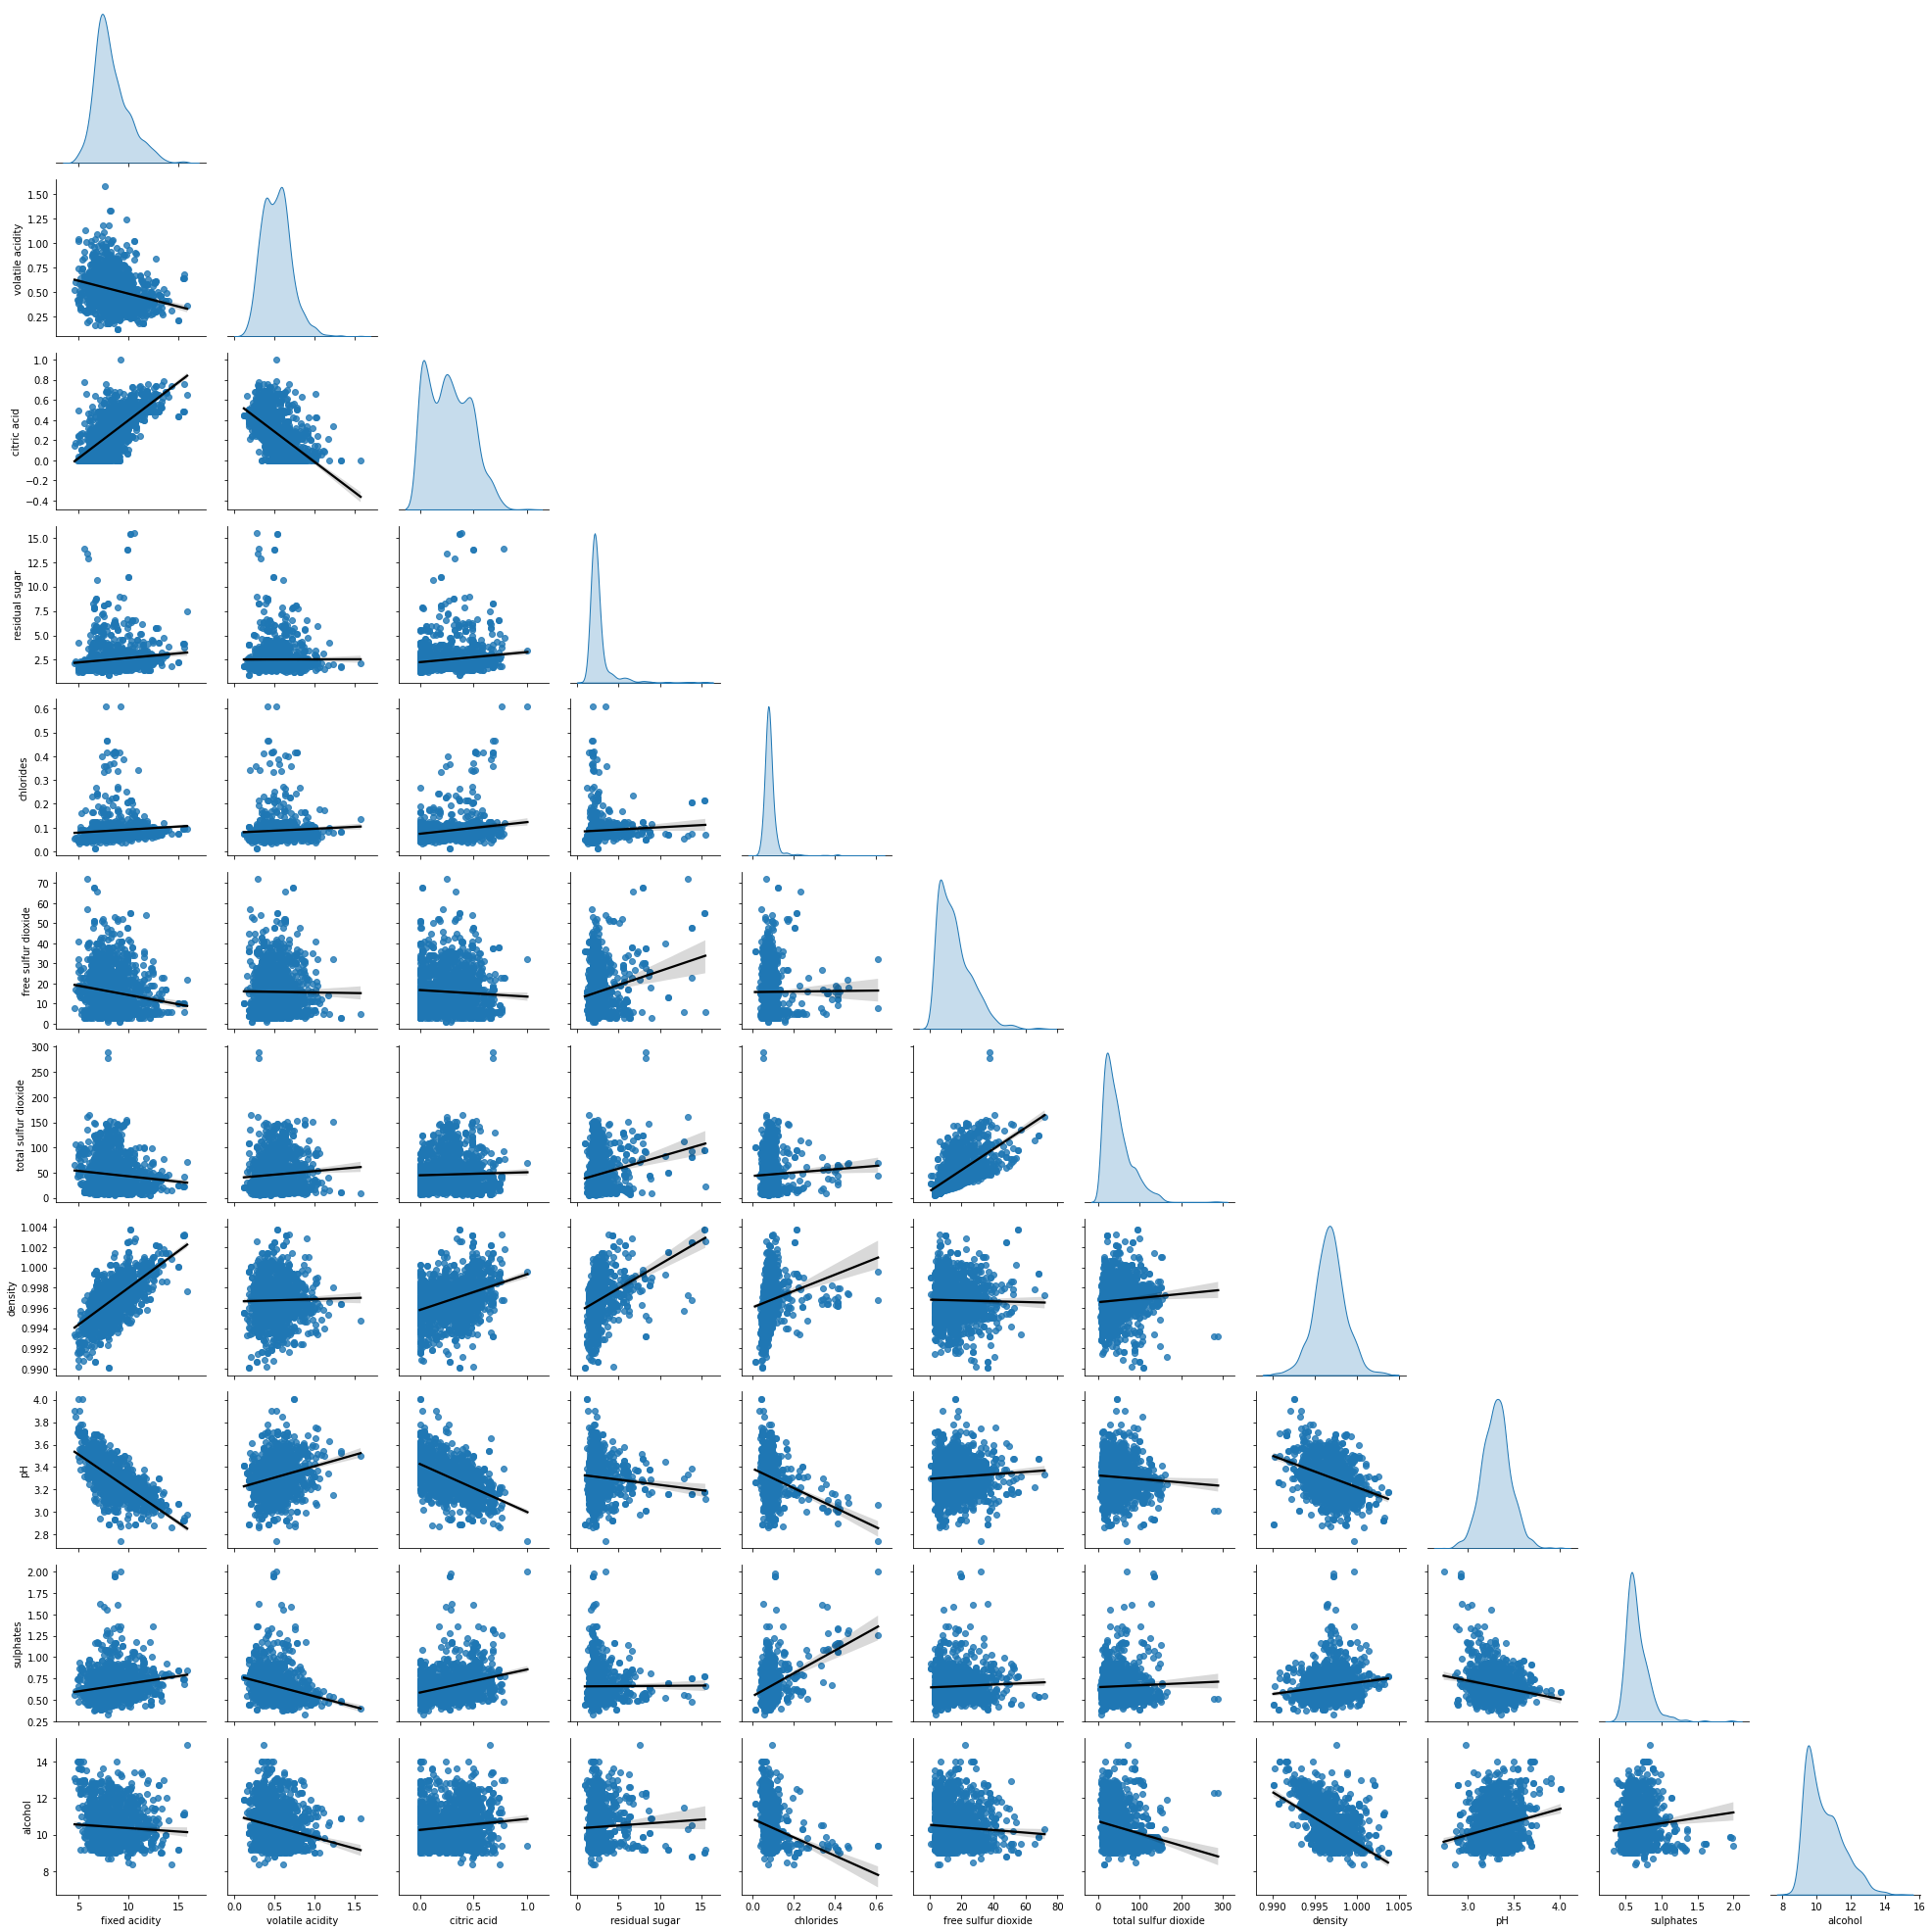

In [7]:
sns.pairplot(data.drop(columns = 'quality'), kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws':{'color': 'black'}}, corner = True)
plt.tight_layout()
plt.show()

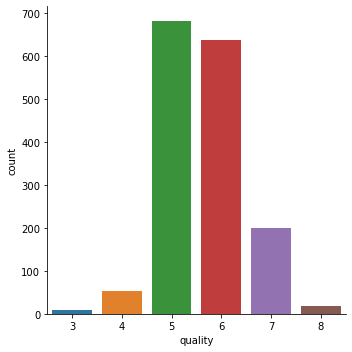

In [8]:
sns.catplot(x='quality', data = data, kind = 'count')

In [9]:
#Check for outliers if any, handle them
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/Users/icyboguyaman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

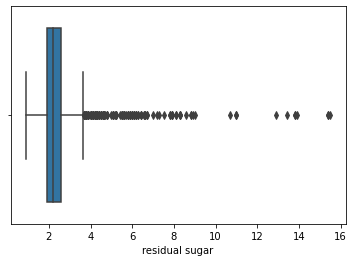

In [10]:
sns.boxplot(data['residual sugar'])

In [11]:
#Upper and lower limit

ulimit = data['residual sugar'].mean() + 3*data['residual sugar'].std()
llimit = data['residual sugar'].mean() - 3*data['residual sugar'].std()
print('Upper limit is: ', ulimit)
print('Lower Limit is: ', llimit)

Upper limit is:  6.768589681961493
Lower Limit is:  -1.6909786750821896


In [12]:
data.loc[(data['residual sugar'] > ulimit) | (data['residual sugar'] < llimit)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
163,7.4,0.600,0.26,7.3,0.070,36.0,121.0,0.99820,3.37,0.49,9.4,5
164,7.3,0.590,0.26,7.2,0.070,35.0,121.0,0.99810,3.37,0.49,9.4,5
274,7.5,0.650,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4,5
324,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
480,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5
494,6.5,0.390,0.23,8.3,0.051,28.0,91.0,0.99520,3.44,0.55,12.1,6


In [13]:
#Removing the outliers 

data1 = data.loc[(data['residual sugar'] <= ulimit) & (data['residual sugar'] >= llimit)]
print('Data before removing outliers : ', len(data))
print('Data after removing outliers : ', len(data1))
print('Total Outliers : ', len(data)-len(data1))

Data before removing outliers :  1599
Data after removing outliers :  1569
Total Outliers :  30


/Users/icyboguyaman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

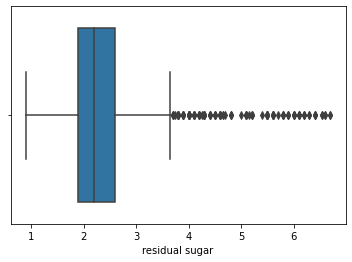

In [14]:
sns.boxplot(data1['residual sugar'])

Text(0.5, 1.0, 'Correlation Heatmap')

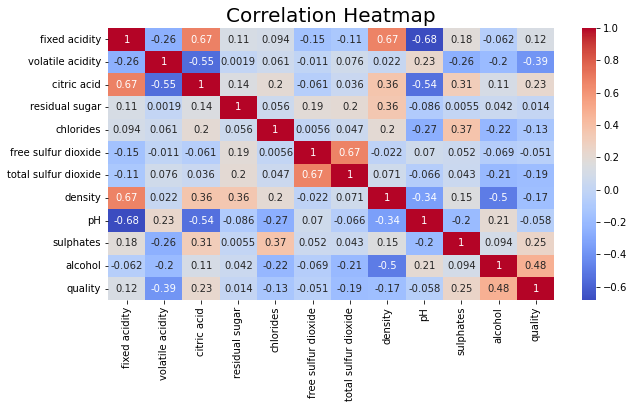

In [15]:
#Implement correlation heatmap
plt.rcParams['figure.figsize'] = [10, 5]
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap",fontsize = 20)

<function matplotlib.pyplot.show(close=None, block=None)>

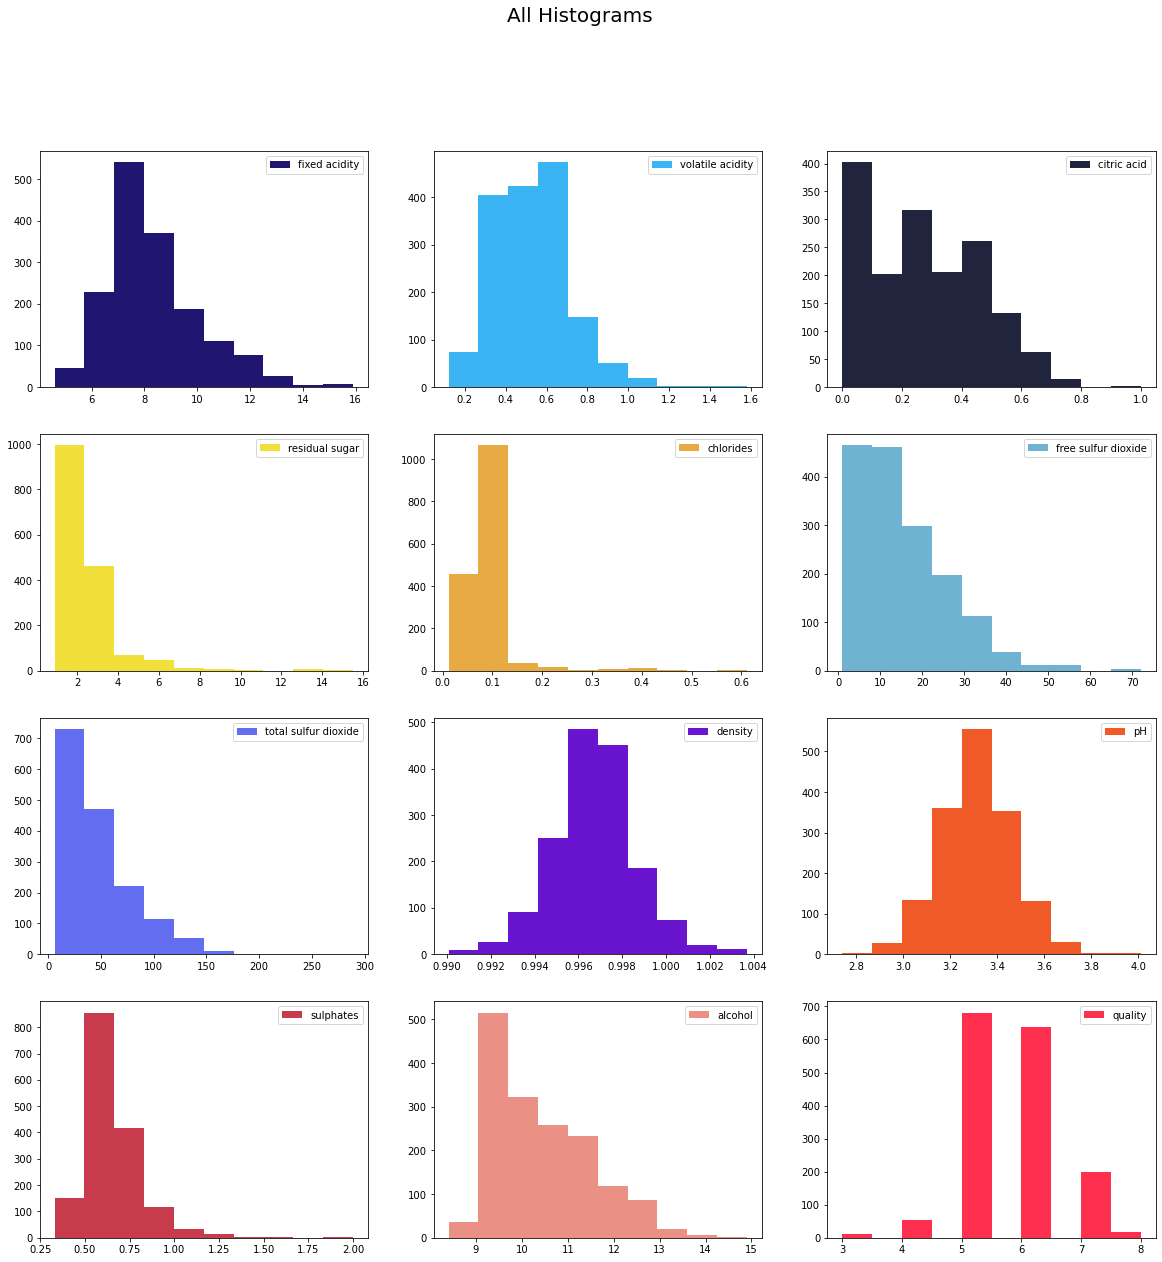

In [16]:
#Check the distribution of data using histograms

fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 20))

colors = ['#211572', '#3AB4F2', '#21243D', '#F2DF3A',
          '#E8AA42', '#6FB2D2', '#626EEF', '#6915CF',
         '#F05A28', '#C83B4C', '#EA9085', '#FF304F']

for index, column in enumerate(data.columns):
    ax = axes.flatten()[index]
    ax.hist(data[column], color = colors[index], label = column)
    ax.legend(loc = 'best')
plt.suptitle("All Histograms", size = 20)
plt.show

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = data.drop(['quality'], axis = 1)
y = data['quality']

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [18]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y1_pred = dt.predict(x_test)

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

*TODO*
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Linear Regression

In [20]:
print('Mean Absolute Error :', mean_absolute_error(y_pred, y_test))
print('R2 Error :', r2_score(y_pred, y_test))
print('Mean Squared Error :', mean_squared_error(y_pred, y_test, squared = False))

Mean Absolute Error : 0.521616696728229
R2 Error : -1.0176255573028725
Mean Squared Error : 0.664709810155757


#### Decision Tree

In [21]:
print('Mean Absolute Error :', mean_absolute_error(y1_pred, y_test))
print('R2 Error :', r2_score(y1_pred, y_test))
print('Mean Squared Error :', mean_squared_error(y1_pred, y_test, squared = False))

Mean Absolute Error : 0.465625
R2 Error : -0.14177489177489178
Mean Squared Error : 0.8120190884455858


### Comparing both Linear Regression and Decision Tree
#### Linear Regression
Mean Absolute Error : 0.5035753448014375

R2 Error : -0.6433229148875068

Mean Squared Error : 0.6569083472313952

#### Decision Tree
Mean Absolute Error : 0.45625

R2 Error : 0.011597412436622268

Mean Squared Error : 0.8139410298049853

Feature: 0, Score: 0.01320
Feature: 1, Score: -1.09182
Feature: 2, Score: -0.16946
Feature: 3, Score: 0.01647
Feature: 4, Score: -1.81152
Feature: 5, Score: 0.00406
Feature: 6, Score: -0.00355
Feature: 7, Score: -12.79429
Feature: 8, Score: -0.51219
Feature: 9, Score: 0.90438
Feature: 10, Score: 0.26890


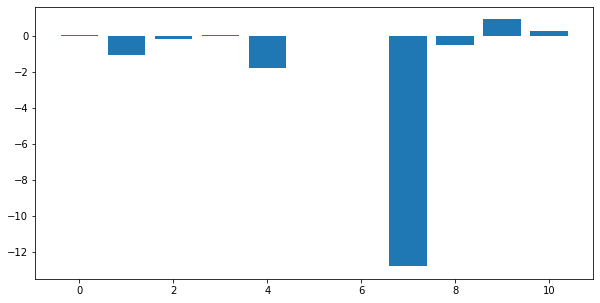

In [22]:
#Calculating the feature importance

importance = lr.coef_

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.05501
Feature: 1, Score: 0.15483
Feature: 2, Score: 0.02649
Feature: 3, Score: 0.04751
Feature: 4, Score: 0.07771
Feature: 5, Score: 0.04018
Feature: 6, Score: 0.08402
Feature: 7, Score: 0.05810
Feature: 8, Score: 0.06389
Feature: 9, Score: 0.11695
Feature: 10, Score: 0.27530


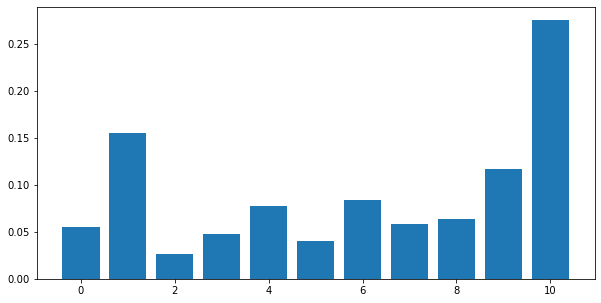

In [23]:
importance = dt.feature_importances_

for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Conclusion

- The result of the study, including the variables that were discovered to have the greatest influence on wine quality,as well as efficiency of the predictive model.

- It would also point out that the study's shortcomings and recommend topics for further investigation, and will also go into how the results affect both consumer and the wine business.

#### Future Work
- More wine kinds and areas might be studied in future research to increase the generalization of the model.

- More data might be used in future research, such as chemical analysis of wine, weather conditions, vineyard management procedures.